<a href="https://colab.research.google.com/github/adeangg/SkripsinyaAde/blob/main/Grey_Model_Discrete_Fractional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gamma

In [2]:
data_skripsi = [90153, 87023, 94190, 97512, 97400, 95103, 96012, 93192, 108479, 118720, 114112, 106970, 110932, 107321, 120994]
data_artikel = [24.681, 23.212, 22.144, 21.851, 22.179, 21.176, 20.440, 19.744, 18.591]
timestamp_skripsi = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
timestamp_artikel = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

df_artikel = pd.DataFrame({'timestamp': timestamp_artikel, 'data': data_artikel})
df_skripsi = pd.DataFrame({'timestamp': timestamp_skripsi, 'data': data_skripsi})

In [3]:
data_real = df_skripsi['data']
timestamp_real = df_skripsi['timestamp']

n = 12
gwo = 1.0095936428072143
chosen = 1
r = gwo

data_train = data_real[:n]
data_test = data_real[n:]

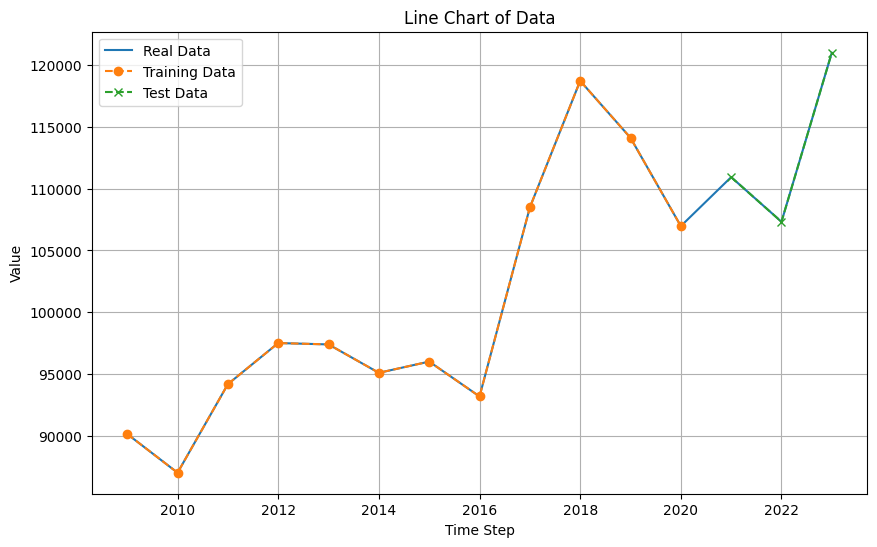

In [4]:
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(timestamp_real, data_real, label='Real Data')
plt.plot(timestamp_real[:n], data_train, label='Training Data', marker='o', linestyle='--')
plt.plot(timestamp_real[n:], data_test, label='Test Data', marker='x', linestyle='--')

# Add labels and title
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Line Chart of Data')

# Add legend
plt.legend()
plt.grid(True)

# Display the chart
plt.show()

In [5]:
# Menghitung barisan FOA dari X0 menggunakan nilai r
def r_FOA_series(X0, r):
    n = len(X0)
    X_r = np.zeros(n)
    for k in range(1, n + 1):
        sum_term = 0
        for i in range(1, k + 1):
            coefficient = gamma(r + k - i) / (gamma(k - i + 1) * gamma(r))
            sum_term += coefficient * X0[i - 1]
        X_r[k - 1] = sum_term
    return X_r

# Dapatkan parameter model FDGM dari nilai Xr
def compute_parameters_FDGM(X_r):
    n = len(X_r)
    Y = X_r[1:]
    B = np.vstack((X_r[:-1], np.ones(n - 1))).T
    beta = np.linalg.inv(B.T @ B) @ B.T @ Y
    return beta

# Hitung hasil prediksi Xr (Xr_hat) menggunakan parameter
def compute_Xr_hat(a, b, x0, steps): # Steps digunakan apabila ingin melakukan forecasting ke depan
    n = len(x0)
    Xr_hat = [x0[0]]
    a_float = float(a)
    b_float = float(b)
    for k in range(2, n + 1 + steps):
        term1 = (x0[0] - b_float / (1 - a_float)) * (a_float ** (k - 1))
        term2 = (b_float / (1 - a_float))
        Xr_hat.append(term1 + term2)
    return Xr_hat

# Hitung hasil prediksi X0 (X0_hat) menggunakan Xr_hat dan nilai r
def compute_X0_hat(Xr_hat, r):
    n = len(Xr_hat)
    restored_values = [Xr_hat[0]]
    for k in range(2, n + 1):
        restored_k = 0
        for i in range(k):
            coefficient = ((-1) ** i) * (gamma(r + 1) / ((gamma(i + 1) * gamma(r - i + 1))))
            restored_k += coefficient * Xr_hat[k - i - 1]
        restored_values.append(restored_k)
    return restored_values

In [6]:
X_r = r_FOA_series(data_train, r) # r hasil GWO, yaitu sebesar 1.0095936428072143
beta = compute_parameters_FDGM(X_r)
xr_hat = compute_Xr_hat(beta[0], beta[1], X_r, len(data_real)-n)
x0_hat = compute_X0_hat(xr_hat, r)
print('Deret X0 hat : ')
for val in x0_hat:
  print(f"{val:.4f}")

Deret X0 hat : 
90153.0000
89614.1827
91490.8606
93549.9900
95730.2141
98007.3810
100370.2274
102813.0635
105333.0002
107928.7154
110599.8397
113346.6220
116169.7365
119070.1645
122049.1196


In [7]:
def each_error(actual, predicted):
    """
    Menghitung persentase error untuk tiap pasangan nilai aktual dan prediksi.

    Parameters:
    - actual (list): Daftar nilai aktual.
    - predicted (list): Daftar nilai prediksi.

    Returns:
    - list: Daftar persentase error untuk tiap pasangan nilai.
    """
    if len(actual) != len(predicted):
        raise ValueError("Panjang data aktual dan prediksi harus sama.")

    percentage_error = [
        abs(pred - act) / act * 100
        for act, pred in zip(actual, predicted)
    ]
    return percentage_error

In [8]:
# Memanggil fungsi
errors = each_error(data_train, x0_hat[:n])

# Menampilkan hasil
for i, error in enumerate(errors, start=1):
    print(f"Data ke-{i}: Error = {error:.4f}%")

Data ke-1: Error = 0.0000%
Data ke-2: Error = 2.9776%
Data ke-3: Error = 2.8656%
Data ke-4: Error = 4.0631%
Data ke-5: Error = 1.7144%
Data ke-6: Error = 3.0539%
Data ke-7: Error = 4.5393%
Data ke-8: Error = 10.3239%
Data ke-9: Error = 2.9001%
Data ke-10: Error = 9.0897%
Data ke-11: Error = 3.0778%
Data ke-12: Error = 5.9611%


In [9]:
# Memanggil fungsi
errors = each_error(data_test, x0_hat[n:])

# Menampilkan hasil
for i, error in enumerate(errors, start=1):
    print(f"Data ke-{i+n}: Error = {error:.4f}%")

Data ke-13: Error = 4.7216%
Data ke-14: Error = 10.9477%
Data ke-15: Error = 0.8720%


In [10]:
def compute_mape(actual, predicted):
    """
    Menghitung Mean Absolute Percentage Error (MAPE).
    """
    actual, predicted = np.array(actual[1:]), np.array(predicted[1:])  # Skip nilai pertama
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return round(mape, 4)

def compute_mae(actual, predicted):
    """
    Menghitung Mean Absolute Error (MAE).
    """
    actual, predicted = np.array(actual[1:]), np.array(predicted[1:])  # Skip nilai pertama
    mae = np.mean(np.abs(actual - predicted))
    return round(mae, 4)

def compute_rmse(actual, predicted):
    """
    Menghitung Root Mean Squared Error (RMSE).
    """
    actual, predicted = np.array(actual[1:]), np.array(predicted[1:])  # Skip nilai pertama
    rmse = np.sqrt(np.mean((actual - predicted) ** 2))
    return round(rmse, 4)

In [11]:
def compute_mape_test(actual, predicted):
    """
    Menghitung Mean Absolute Percentage Error (MAPE).
    """
    actual, predicted = np.array(actual), np.array(predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return round(mape, 4)

def compute_mae_test(actual, predicted):
    """
    Menghitung Mean Absolute Error (MAE).
    """
    actual, predicted = np.array(actual), np.array(predicted)
    mae = np.mean(np.abs(actual - predicted))
    return round(mae, 4)

def compute_rmse_test(actual, predicted):
    """
    Menghitung Root Mean Squared Error (RMSE).
    """
    actual, predicted = np.array(actual), np.array(predicted)
    rmse = np.sqrt(np.mean((actual - predicted) ** 2))
    return round(rmse, 4)

In [12]:
print('MAPE training:', compute_mape(data_train, x0_hat[:n]))
print('MAE training:', compute_mae(data_train, x0_hat[:n]))
print('RMSE training:', compute_rmse(data_train, x0_hat[:n]))

MAPE training: 4.597
MAE training: 4693.8051
RMSE training: 5492.3537


In [13]:
print('MAPE testing:', compute_mape(data_test, x0_hat[n:]))
print('MAE testing:', compute_mae(data_test, x0_hat[n:]))
print('RMSE testing:', compute_rmse(data_test, x0_hat[n:]))

MAPE testing: 5.9099
MAE testing: 6402.142
RMSE testing: 8341.3471


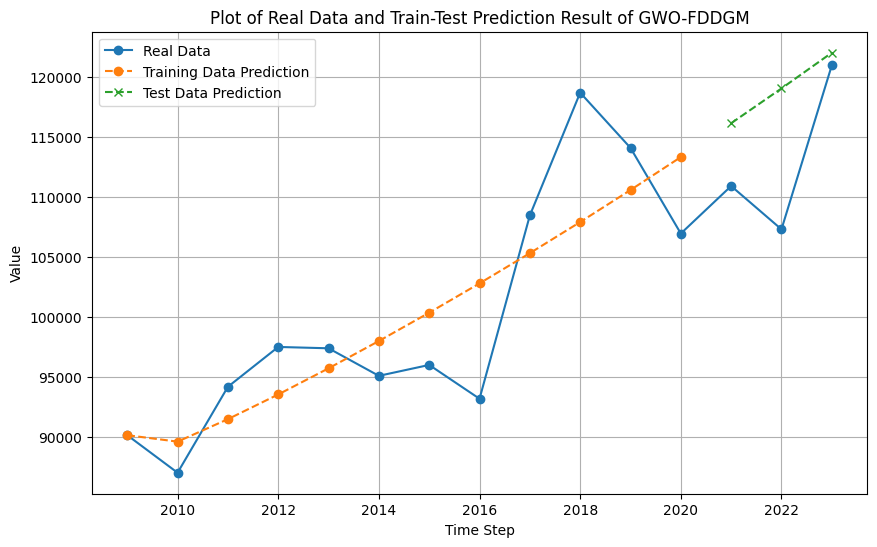

In [14]:
import matplotlib.pyplot as plt

# Assuming data_real, n, data_train, and data_test are defined as in your example

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(timestamp_real, data_real, label='Real Data',  marker='o')
plt.plot(timestamp_real[:n], x0_hat[:n], label='Training Data Prediction', marker='o', linestyle='--')
plt.plot(timestamp_real[n:], x0_hat[n:], label='Test Data Prediction', marker='x', linestyle='--')

# Add labels and title
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Plot of Real Data and Train-Test Prediction Result of GWO-FDDGM')

# Add legend
plt.legend()
plt.grid(True)

# Display the chart
plt.show()